---
title: "집단 간 비교 : 심슨의 역설"
author: "강신성"
date: "2023-10-14"
date-format: iso
categories: [python, plotnine]
---

심슨의 역설

> 여러 집단으로 나눠진 데이터들을 하나로 합쳐서 분석해버리면 어떻게 될까?

## 1. 라이브러리 imports

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

## 2. 필요한 코드 | 비교를 위한 시각화

### **A. `geom_col`()**
---
\- 예시1 : `geom_col()` 기본적인 막대 그래프

In [3]:
df = pd.DataFrame({'x':[0,1],'y':[40,60]})
df

,x,y
0,0,40
1,1,60


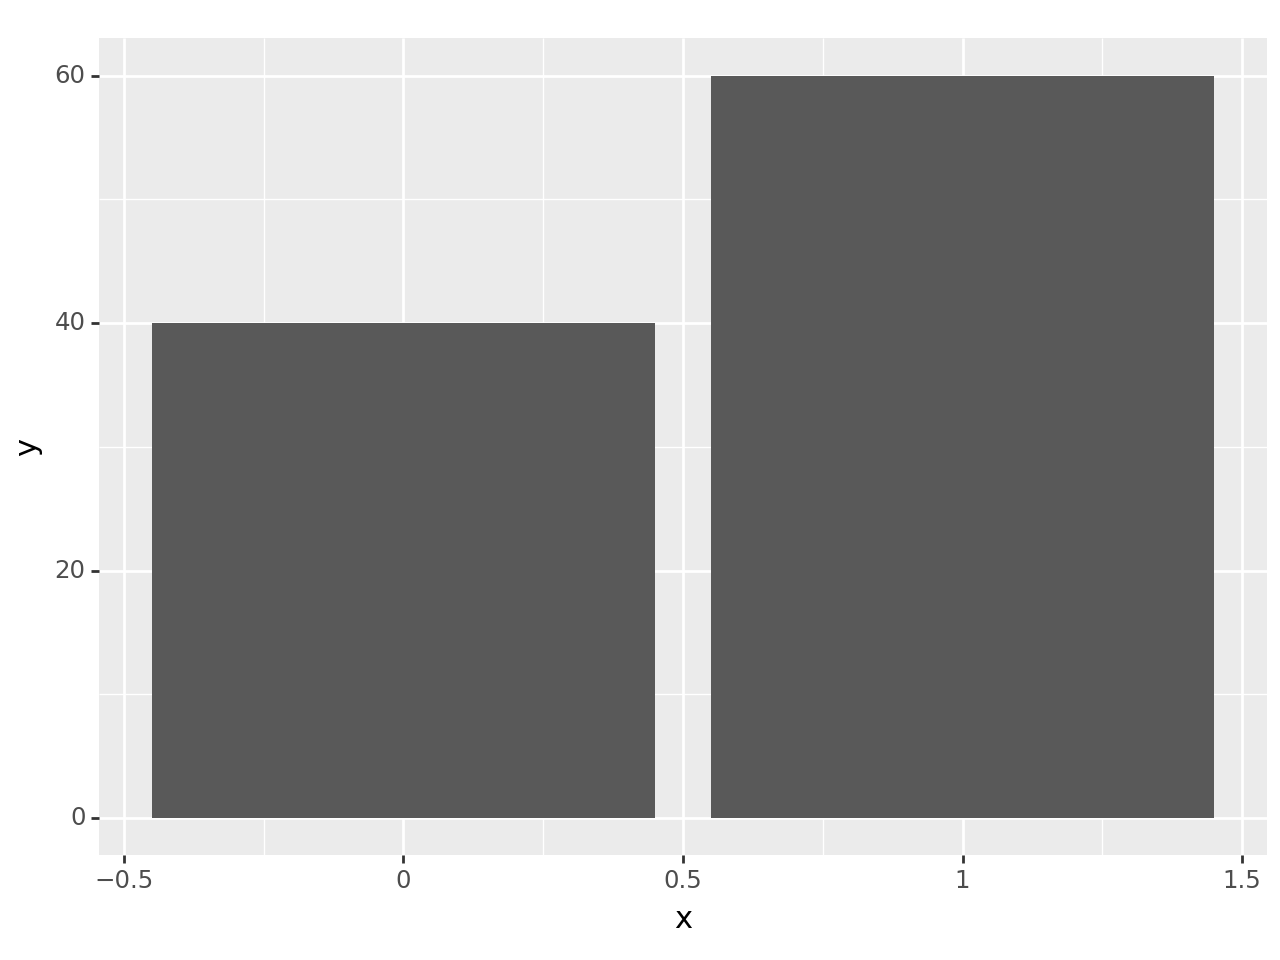

<Figure Size: (640 x 480)>

In [4]:
fig = ggplot(df)
bar = geom_col(aes(x = 'x', y = 'y'))   ## geom_bar()는 그냥 없다고 생각하자.

fig + bar

\- 예시2 : $x$축이 범주형인 경우

In [5]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

,sex,score
0,male,40
1,female,60


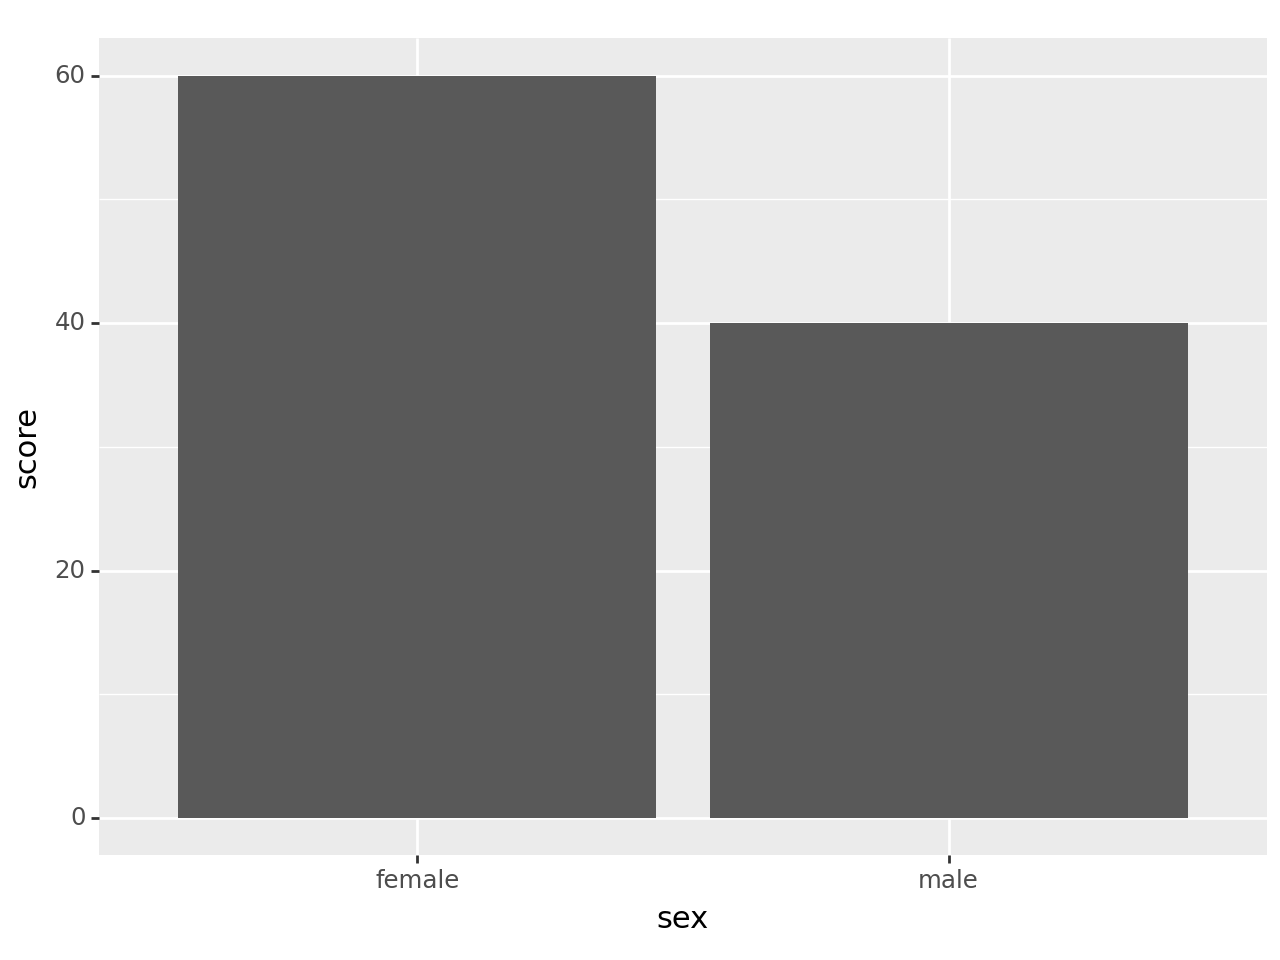

<Figure Size: (640 x 480)>

In [6]:
fig = ggplot(df)
bar = geom_col(aes(x = 'sex', y = 'score'))   ## 설명변수가 문자열이어도 산출해준다.

fig + bar

\- 예시3 : `fill = 'index'`예시2에서 범주별 색깔로 구분하고 싶은 경우

In [7]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

,sex,score
0,male,40
1,female,60


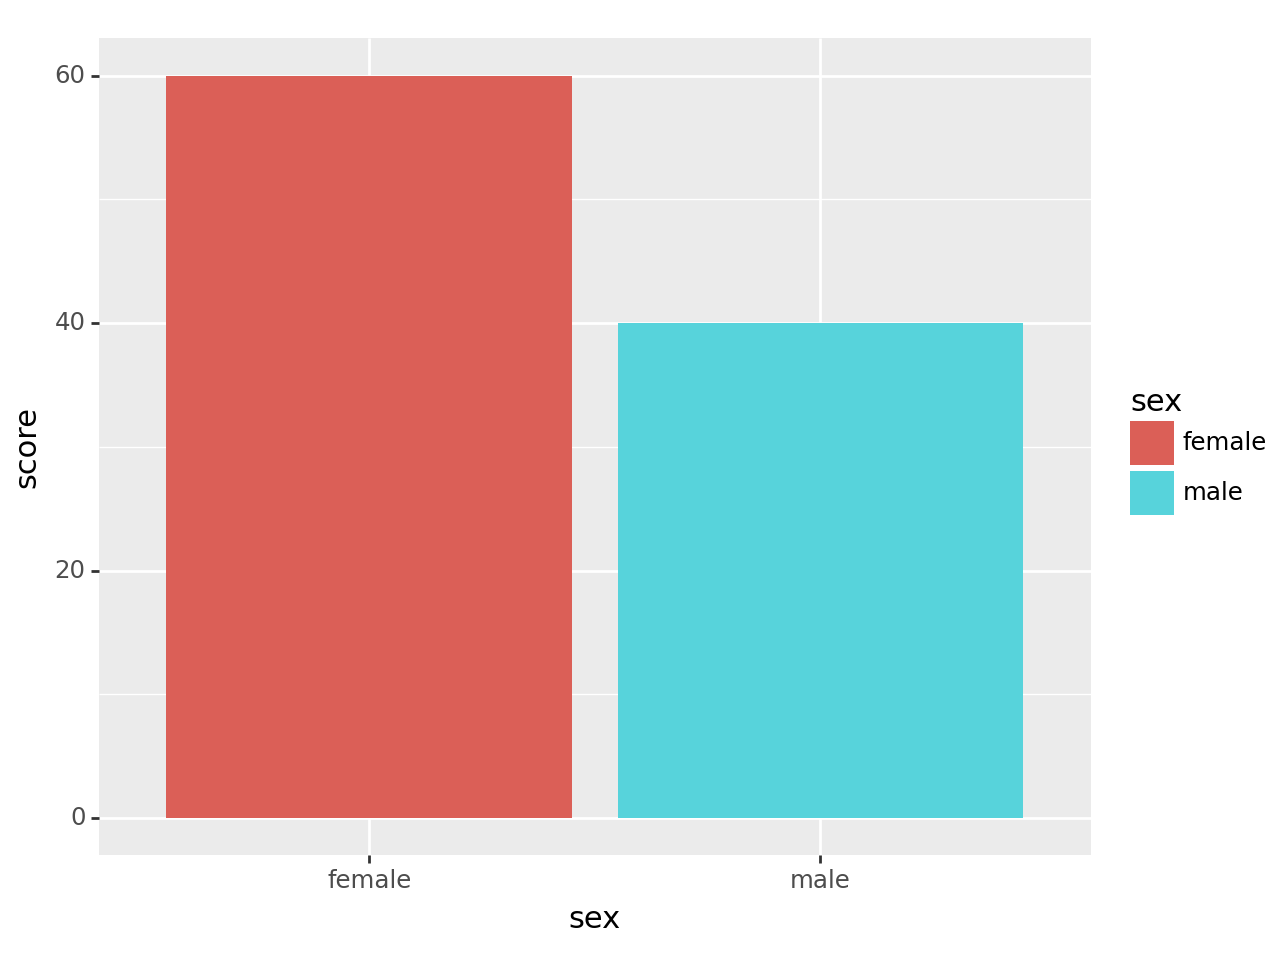

<Figure Size: (640 x 480)>

In [8]:
fig = ggplot(df)
bar = geom_col(aes(x = 'sex', y = 'score', fill = 'sex'))   ## color 옵션도 있으나, 이것은 바깥의 테두리 색상만 바꾼다.

fig + bar

\- 예시4 : 예시3에서 `scale_fill_manual()`을 이용하여 색상 변경하기

In [16]:
df = pd.DataFrame({'sex':['male','female'],'score':[40,60]})
df

,sex,score
0,male,40
1,female,60


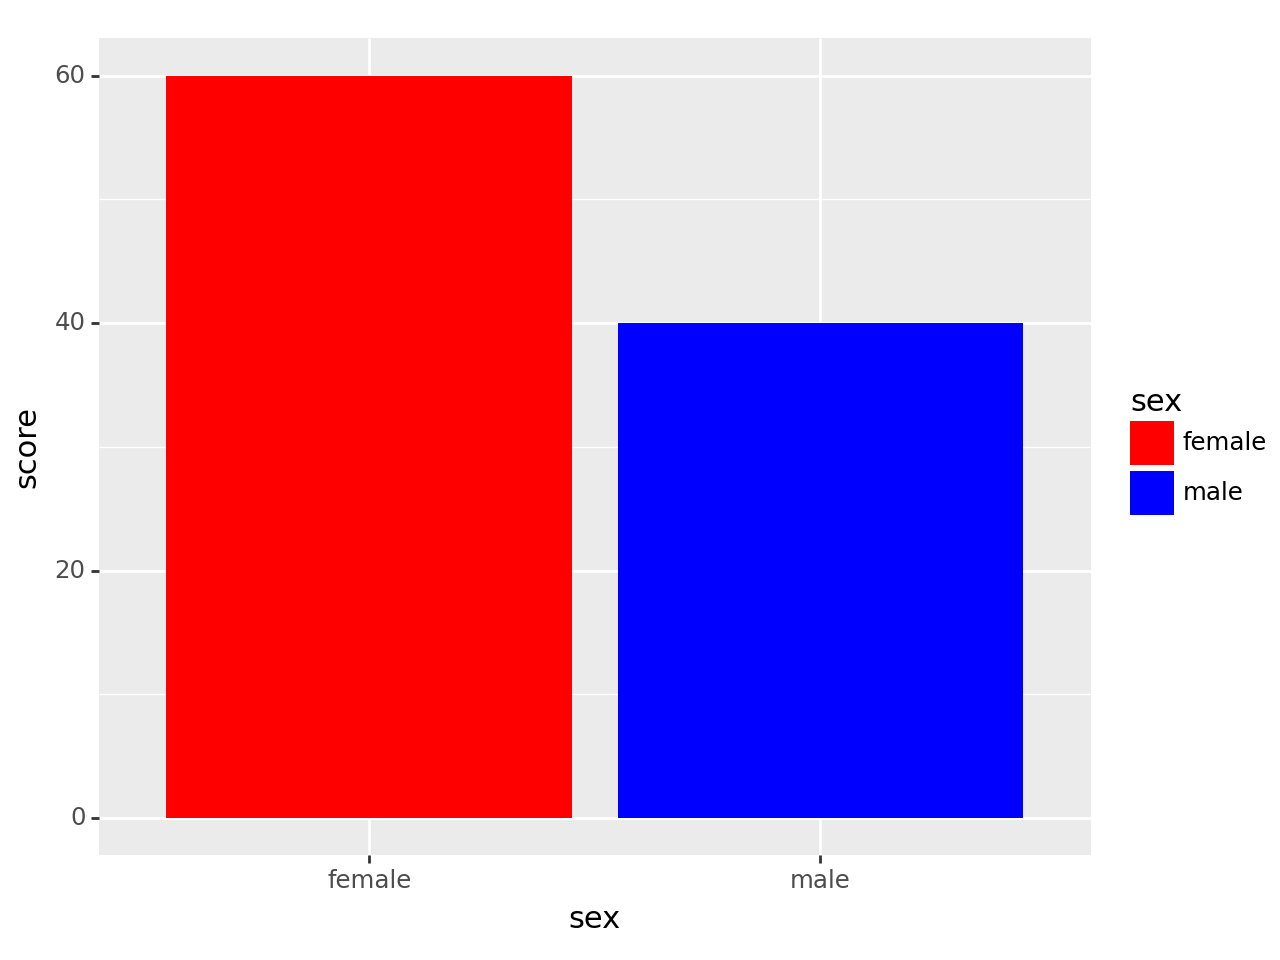

<Figure Size: (640 x 480)>

In [9]:
fig = ggplot(df)
bar = geom_col(aes(x = 'sex', y = 'score', fill = 'sex'))

fig + bar + scale_fill_manual(['red','blue'])

> 색상 입력에는 이름이 정해진 색상들 뿐만 아니라 `plt.plot(color = option)`에서의 옵션과 같이 이미 설정된 C0, C1... 또는 hex code도 입력이 가능하다.

### **B. `facet_warp()` | 한 면을 감싸다.**
---

\- 예시1 : `facet_warp()`를 이용한 면분할 -- 반별로 면분할

In [10]:
df = pd.DataFrame({'sex':['male','female','male','female'],'score':[40,60,50,20],'class':['A','A','B','B']})
df

,sex,score,class
0,male,40,A
1,female,60,A
2,male,50,B
3,female,20,B


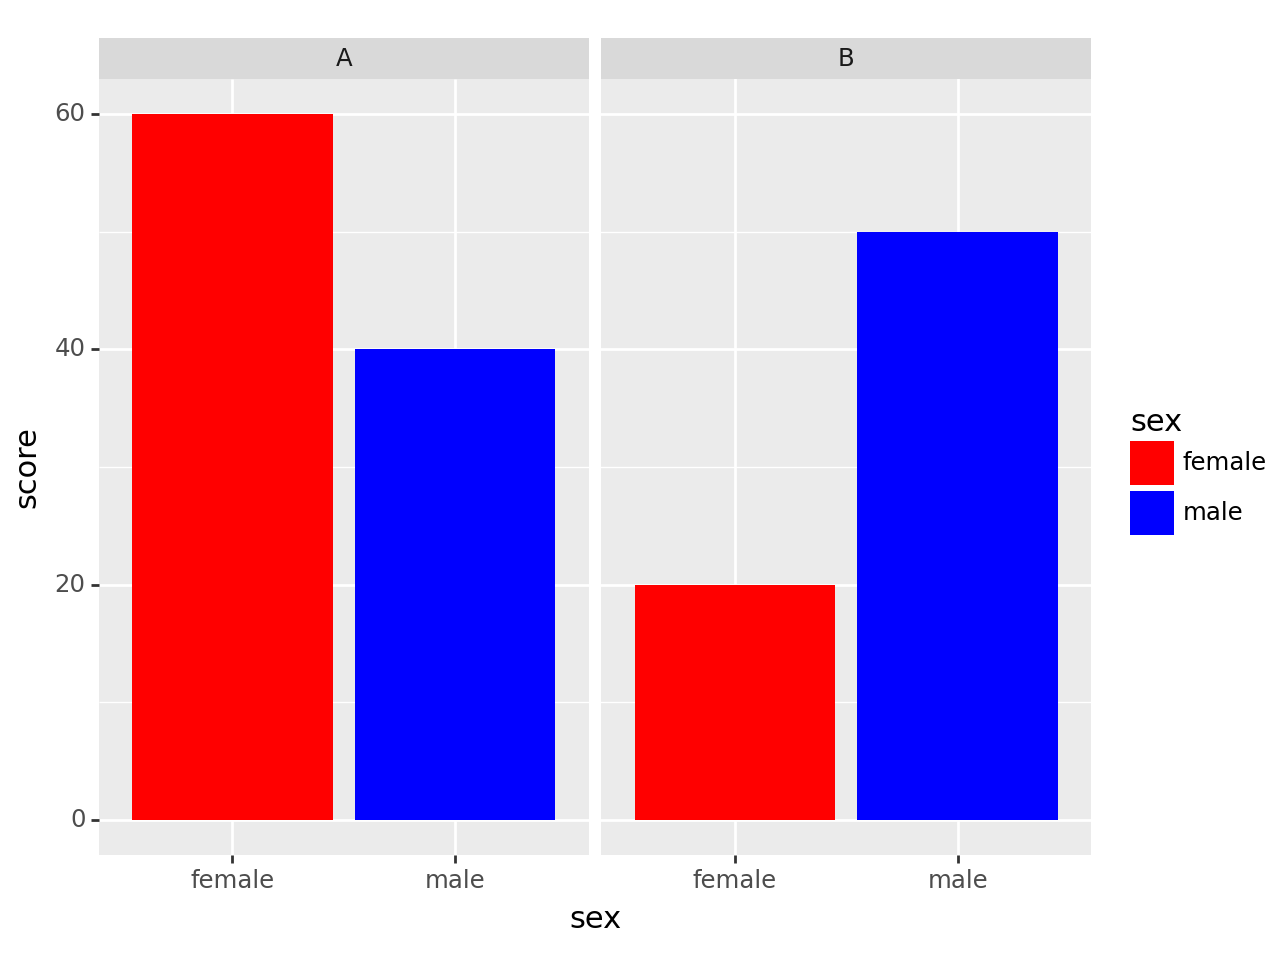

<Figure Size: (640 x 480)>

In [20]:
ggplot(df) + geom_col(aes(x='sex',y='score',fill='sex')) + scale_fill_manual(['red','blue']) + facet_wrap('class')

> `class`별로 그래프의 면을 분할해서 표시

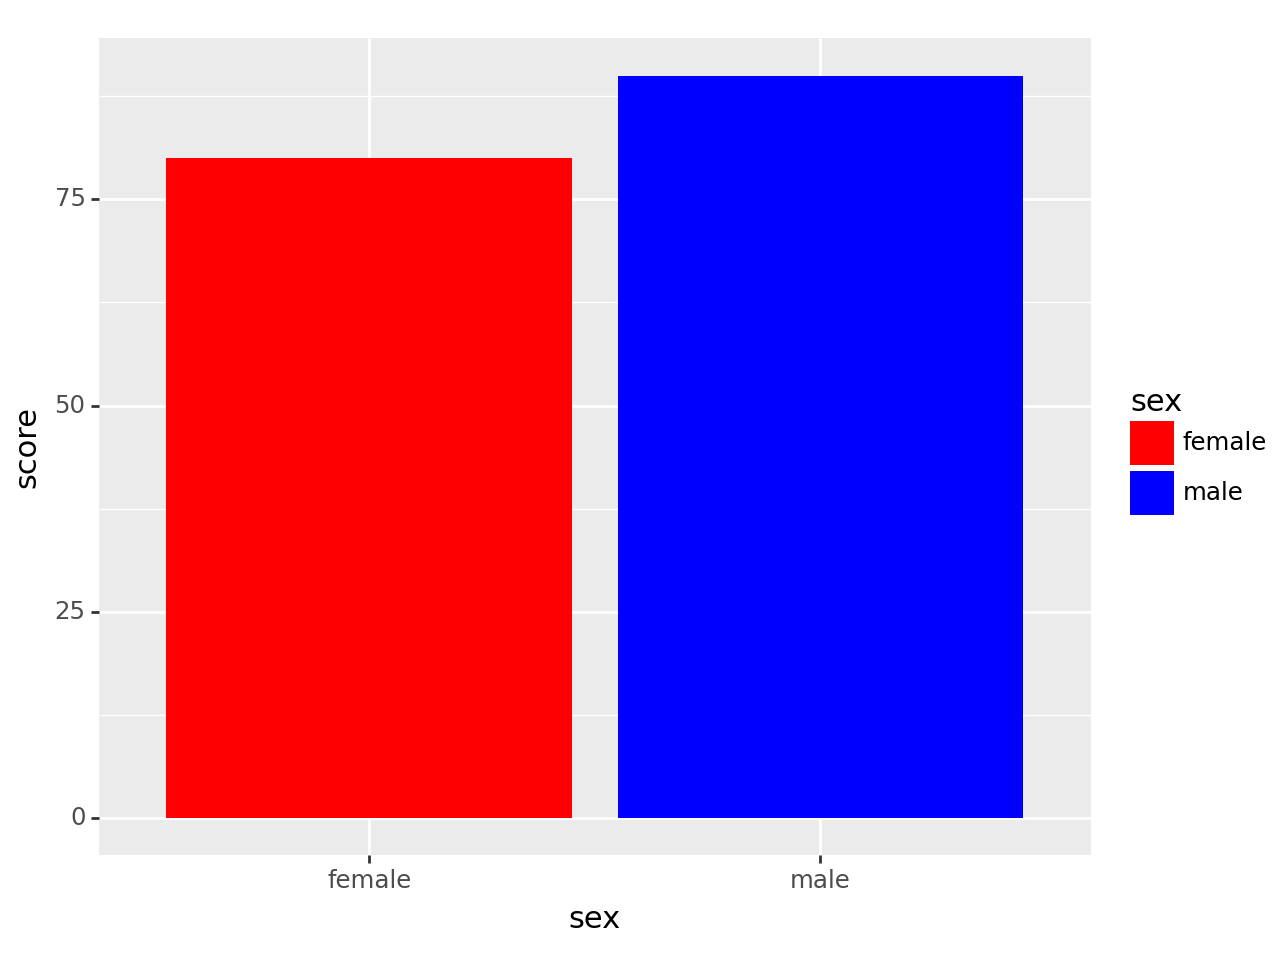

<Figure Size: (640 x 480)>

In [12]:
ggplot(df) + geom_col(aes(x = 'sex', y = 'score', fill = 'sex')) + scale_fill_manual(['red','blue'])  ## 지정해주지 않을 경우 기본적으로 합산하여 지정된다.

\- 예시2 : 성별로 면분할

In [24]:
df = pd.DataFrame({'sex':['male','female','male','female'],'score':[40,60,50,20],'class':['A','A','B','B']})
df

,sex,score,class
0,male,40,A
1,female,60,A
2,male,50,B
3,female,20,B


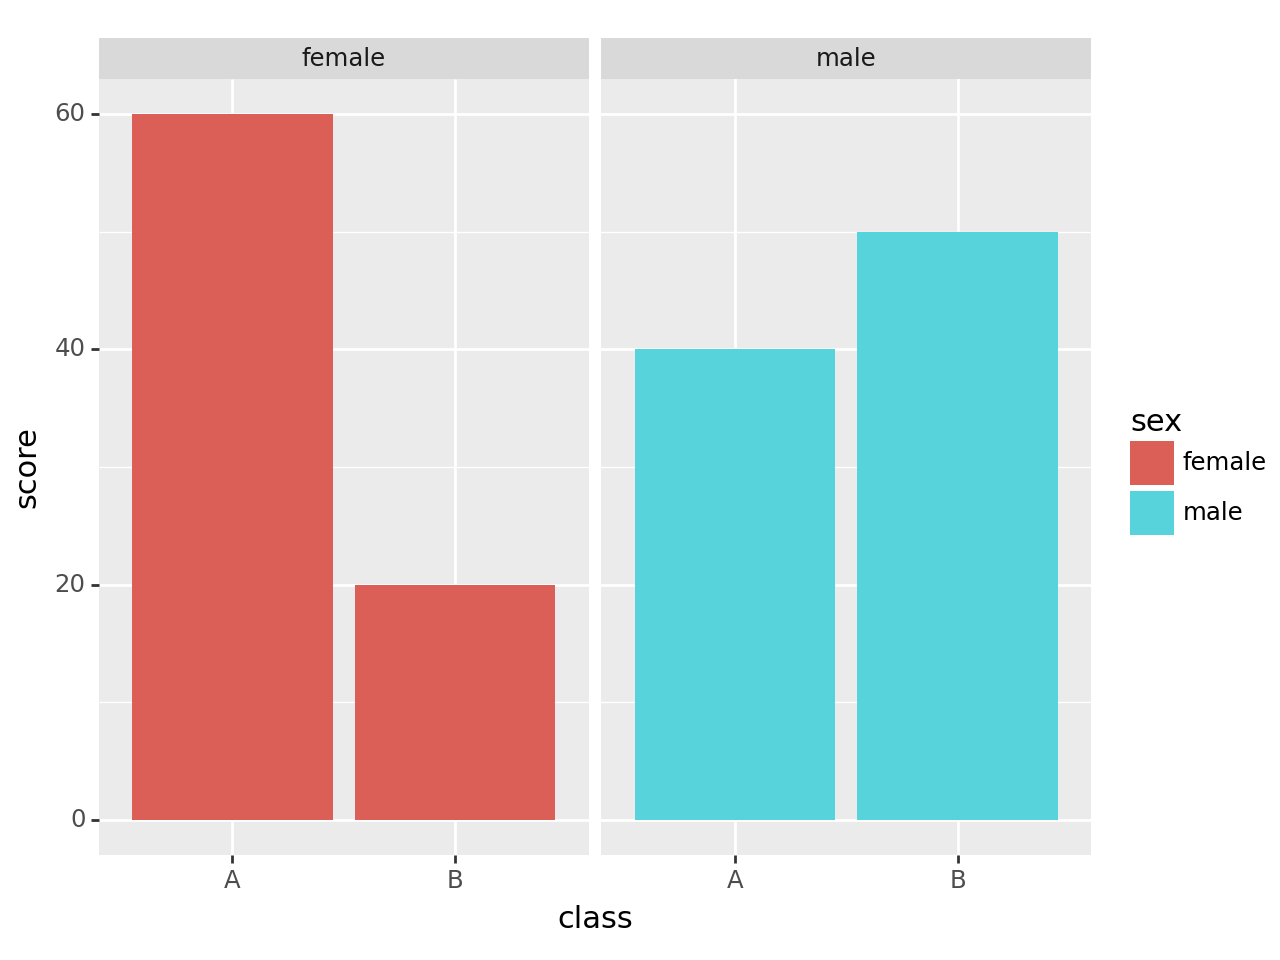

<Figure Size: (640 x 480)>

In [25]:
ggplot(df) + geom_col(aes(x='class',y='score',fill='sex')) + facet_wrap('sex')

> 이 경우 `'sex'`로 `color`를 구분했으므로 면마다 다른 색의 그래프만이 나온다.

## 4. 심슨의 역설

\- 버클리 대학교의 입학 데이터에서 gender bias가 존재한다는 주장이 있었다.

In [13]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


### **A. 시각화 1 : 전체 합격률 시각화 -- pandas 초보**
---

\- 단순무식하게 query만 이용해서 그룹화

In [14]:
df.query('gender == "female" and result == "pass"')['count'].sum()

772

> 여성 지원자 중 합격한 사람의 수

In [15]:
df.query('gender == "female"')['count'].sum()

1835

> 총 여성 지원자 수

In [16]:
(df.query('gender == "female" and result == "pass"')['count'].sum()/df.query('gender == "female"')['count'].sum(),
 df.query('gender == "male" and result == "pass"')['count'].sum()/df.query('gender == "male"')['count'].sum())

(0.420708446866485, 0.5202526941657376)

In [23]:
tidydata_ = pd.DataFrame({'female' : [df.query('gender == "female" and result == "pass"')['count'].sum()/df.query('gender == "female"')['count'].sum()],
                          'male' : [df.query('gender == "male" and result == "pass"')['count'].sum()/df.query('gender == "male"')['count'].sum()]})

tidydata_

,female,male
0,0.420708,0.520253


> 이렇게 하면 시각화 못해요...

In [18]:
tidydata = pd.DataFrame({'sex' : ['male', 'female'],
                         'rate' : [df.query('gender == "female" and result == "pass"')['count'].sum()/df.query('gender == "female"')['count'].sum(),
                                   df.query('gender == "male" and result == "pass"')['count'].sum()/df.query('gender == "male"')['count'].sum()]})

tidydata

,sex,rate
0,male,0.420708
1,female,0.520253


### **B. 시각화 1 : 전체 합격률 시각화 -- pandas 고수**
---

**`df.pivot_table(index = row, columns = col, valuse = value_col, aggfunc = func)`**

\- 피벗 테이블을 만든다. (두 범주형 자료들을 나누는 것)

In [24]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)

result,fail,pass
gender,,
female,1063,772
male,1291,1400


In [43]:
df.pivot_table(index='gender',columns='result',values='count')    ## 집계함수의 디폴트 값이 mean이다

result,fail,pass
gender,,
female,177.166667,128.666667
male,215.166667,233.333333


> 이 상태에서 `reset_index()`를 통해 자료를 쉽게 정리할 수 있다.

In [29]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)\
.assign(rate = lambda _df : _df['pass']/(_df['fail'] + _df['pass']))
## 비율까지 추가한 모습, lambda _df : _df를 통해 현재 데이터프레임까지 호출한 모습

result,fail,pass,rate
gender,,,
female,1063,772,0.420708
male,1291,1400,0.520253


In [30]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc=sum)\
.assign(rate = lambda _df : _df['pass']/(_df['fail'] + _df['pass'])).reset_index()

result,gender,fail,pass,rate
0,female,1063,772,0.420708
1,male,1291,1400,0.520253


\- 이제 가공된 데이터를 `tidydata`라고 하여 그래프를 그려보자.

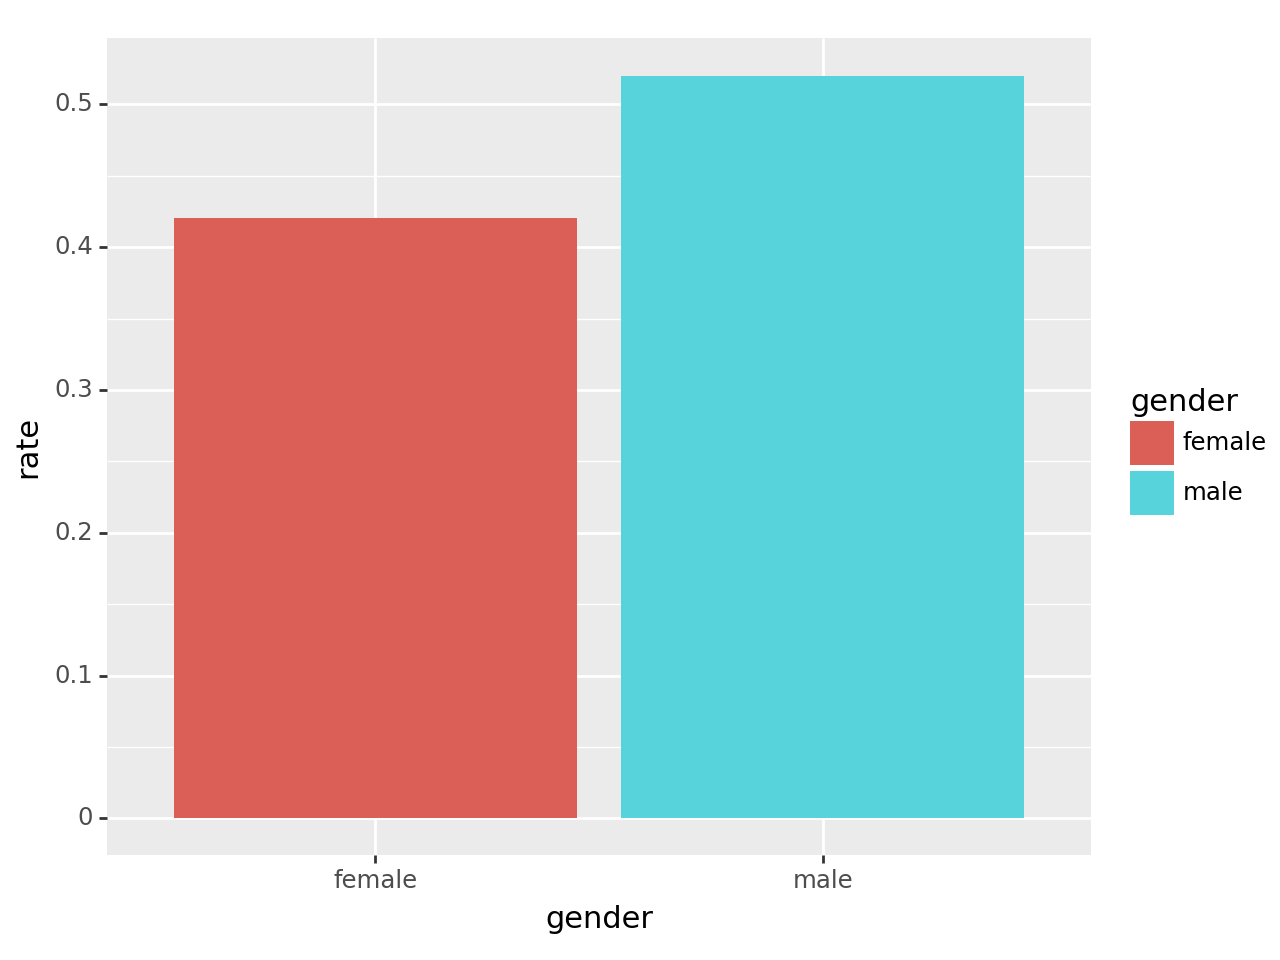

<Figure Size: (640 x 480)>

In [52]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc=sum).assign(rate = lambda _df : _df['pass']/(_df['fail'] + _df['pass'])).reset_index()

fig = ggplot(tidydata)
bar = geom_col(aes(x='gender',fill='gender',y='rate'))
fig+bar

> 이 그래프를 보고 나온 주장 : 여성이 남성에 비해 합격률이 낮으니까 차별이 있다!!

\- 반박

In [32]:
df.pivot_table(index=['department'],columns=['result','gender'],values='count',aggfunc=sum).stack()
##df.pivot_table(index = ['department', 'gender'], columns = 'result', values = 'count', aggfunc = sum)
## 위의 두 코드는 완전히 똑같은 동작을 한다. 아마도...

result             fail  pass
department gender            
A          female    19    89
           male     314   511
B          female     7    18
           male     208   352
C          female   391   202
           male     204   121
D          female   244   131
           male     279   138
E          female   299    94
           male     137    54
F          female   103   238
           male     149   224

In [57]:
temp.pass  ## pass 자체가 파이썬에서 특수하게 사용되는 조건어같은 거여서 안된다.

SyntaxError: invalid syntax (2928908933.py, line 1)

In [58]:
temp = df.pivot_table(index=['department'],columns=['result','gender'],values='count',aggfunc=sum).stack()
temp['fail'] + temp['pass']

department  gender
A           female    108
            male      825
B           female     25
            male      560
C           female    593
            male      325
D           female    375
            male      417
E           female    393
            male      191
F           female    341
            male      373
dtype: int64

In [60]:
df.pivot_table(index=['department'],columns=['result','gender'],values='count',aggfunc=sum).stack()\
.assign(rate = lambda _df: _df['pass']/(_df.fail+_df['pass']))
##df.pivot_table(index = ['gender', 'department'], columns = 'result', values = 'count', aggfunc = sum).reset_index().assign(rate = lambda _df: _df['pass']/(_df.fail+_df['pass']))

result             fail  pass      rate
department gender                      
A          female    19    89  0.824074
           male     314   511  0.619394
B          female     7    18  0.720000
           male     208   352  0.628571
C          female   391   202  0.340641
           male     204   121  0.372308
D          female   244   131  0.349333
           male     279   138  0.330935
E          female   299    94  0.239186
           male     137    54  0.282723
F          female   103   238  0.697947
           male     149   224  0.600536

\- tidydata 완성

In [64]:
df.pivot_table(index=['department'],columns=['result','gender'],values='count',aggfunc=sum).stack()\
.assign(rate = lambda _df: _df['pass']/(_df.fail+_df['pass'])).reset_index().drop(['fail', 'pass'], axis = 1)

tidydata = _
tidydata

result,department,gender,rate
0,A,female,0.824074
1,A,male,0.619394
2,B,female,0.720000
3,B,male,0.628571
4,C,female,0.340641
5,C,male,0.372308
6,D,female,0.349333
7,D,male,0.330935
8,E,female,0.239186
9,E,male,0.282723


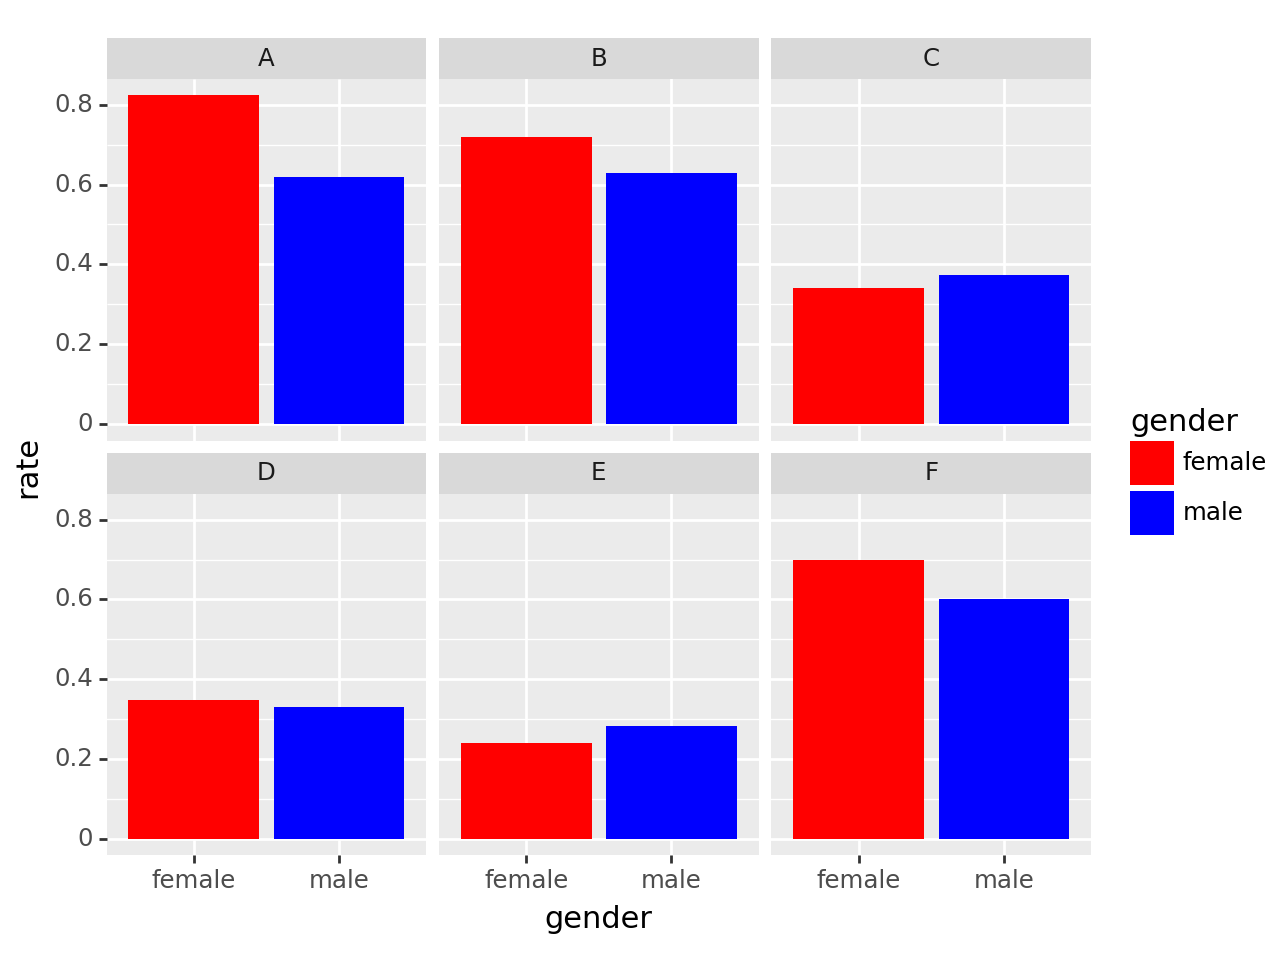

<Figure Size: (640 x 480)>

In [65]:
fig = ggplot(tidydata)
bar = geom_col(aes(x = 'gender', y = 'rate', fill = 'gender'))

fig + bar + scale_fill_manual(['red', 'blue']) + facet_wrap(['department'])

> C와 E를 제외하고는 오히려 여성의 합격 비율이 더 높은 것을 알 수 있다.